## Look at similarity between our mean, high, and low flow estimates and the multi-model medians plotted in *Figure 1* of *Koirala et al.* [2014], or *K14*, in response to Reviewer 3. 
Meg Fowler, 2019-05-28

In [20]:
# Load libraries
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import cartopy
import pickle
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util

from   netCDF4 import Dataset

### Load in data

In [2]:
# -- Load in data from K14 -- #

dirName = '/Users/meganfowler/Documents/Irvine/Flooding/Koirala-to.meg.201905/'    #Directory where data is saved

#Filenames of 20C and 21C data 
histQ5_file   = dirName+'20C_hi-r1_for_85-r1_Q5_multiModelMedian_1971-2000_average.bin'
histQ95_file  = dirName+'20C_hi-r1_for_85-r1_Q95_multiModelMedian_1971-2000_average.bin'
histMean_file = dirName+'20C_hi-r1_for_85-r1_QMean_multiModelMedian_1971-2000_average.bin'
rcpQ5_file    = dirName+'21C_85-r1_Q5_multiModelMedian_2071-2100_average.bin'
rcpQ95_file   = dirName+'21C_85-r1_Q95_multiModelMedian_2071-2100_average.bin'
rcpMean_file  = dirName+'21C_85-r1_QMean_multiModelMedian_2071-2100_average.bin'

#Read in data from binary biles 
histQ5   = np.fromfile(histQ5_file,np.float32).reshape(720,1440)
histQ95  = np.fromfile(histQ95_file,np.float32).reshape(720,1440)
histMean = np.fromfile(histMean_file,np.float32).reshape(720,1440)
rcpQ5    = np.fromfile(rcpQ5_file,np.float32).reshape(720,1440) 
rcpQ95   = np.fromfile(rcpQ95_file,np.float32).reshape(720,1440) 
rcpMean  = np.fromfile(rcpMean_file,np.float32).reshape(720,1440) 


In [3]:
# -- Load in data for our CESM experiments -- #

#Get dimensions from a single file (same will be used for all files)
file1 = '/Users/meganfowler/gp_fuse/Flooding-physiology/Python/outflw1161.nc'
dat   = Dataset(file1)
lat   = dat.variables['lat'][:] 
lon   = dat.variables['lon'][:] 
days  = dat.variables['time'][:]

#Read in mask of which gridcells are land vs. ocean
matData   = sio.loadmat('/Users/meganfowler/gp_fuse/Flooding-physiology/MatlabData/validGridMask_CaMa.mat')
maskVal = matData['maskVal']

#Read in CaMa gridcell areas
matData = sio.loadmat('/Users/meganfowler/gp_fuse/Flooding-physiology/MatlabData/CaMa_gridAreas.mat')
area    = matData['area']

# Load monthly averages from file
[avgCtrl,avgFull,avgPhys,avgRad]=np.load('/Users/meganfowler/gp_fuse/Flooding-physiology/PythonData/MonthlyAverages.pkl')

# Read in extreme flows 
[minCtrl_ann, minFull_ann, minPhys_ann, minRad_ann,maxCtrl_ann,maxFull_ann,
 maxPhys_ann,maxRad_ann,ctrl95_ann,full95_ann,phys95_ann,rad95_ann,ctrl5_ann,
 full5_ann,phys5_ann,rad5_ann] = pickle.load(open('/Users/meganfowler/Documents/GitHub/Physiology-Streamflow/StreamflowAnnualExtremes.pkl', 'rb' ))


### Follow same methods as used in manuscript to make Figure 2 
* Get rid of gridcells without relatively large rivers

In [4]:
# -- Take average over 30 years -- #
ctrl95_annAvg = np.nanmean(ctrl95_ann,axis=0)   #High flows 
full95_annAvg = np.nanmean(full95_ann,axis=0)
phys95_annAvg = np.nanmean(phys95_ann,axis=0)
rad95_annAvg  = np.nanmean(rad95_ann,axis=0)

ctrl5_annAvg  = np.nanmean(ctrl5_ann,axis=0)    #Low flows 
full5_annAvg  = np.nanmean(full5_ann,axis=0)
phys5_annAvg  = np.nanmean(phys5_ann,axis=0)
rad5_annAvg   = np.nanmean(rad5_ann,axis=0)


/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__'

In [5]:
# -- Eliminate places without rivers -- # 
cutoffMax = 500
cutoffMin = 50

#CTRL
maxCtrlNew = ctrl95_annAvg
minCtrlNew = ctrl5_annAvg
maxCtrlNew[np.where(ctrl95_annAvg<=cutoffMax)] = np.nan
minCtrlNew[np.where(ctrl5_annAvg<=cutoffMin)] = np.nan

#FULL 
maxFullNew = full95_annAvg
minFullNew = full5_annAvg
maxFullNew[np.where(ctrl95_annAvg<=cutoffMax)] = np.nan
minFullNew[np.where(ctrl5_annAvg<=cutoffMin)] = np.nan

#PHYS 
maxPhysNew = phys95_annAvg
minPhysNew = phys5_annAvg
maxPhysNew[np.where(ctrl95_annAvg<=cutoffMax)] = np.nan
minPhysNew[np.where(ctrl5_annAvg<=cutoffMin)] = np.nan

#RAD 
maxRadNew = rad95_annAvg
minRadNew = rad5_annAvg
maxRadNew[np.where(ctrl95_annAvg<=cutoffMax)] = np.nan
minRadNew[np.where(ctrl5_annAvg<=cutoffMin)] = np.nan


# -- Define percent change in average min and max flows -- #
pctMinFull = ((minFullNew-minCtrlNew)/minCtrlNew)*100
pctMinPhys = ((minPhysNew-minCtrlNew)/minCtrlNew)*100
pctMinRad  = ((minRadNew-minCtrlNew)/minCtrlNew)*100

pctMaxFull = ((maxFullNew-maxCtrlNew)/maxCtrlNew)*100
pctMaxPhys = ((maxPhysNew-maxCtrlNew)/maxCtrlNew)*100
pctMaxRad  = ((maxRadNew-maxCtrlNew)/maxCtrlNew)*100

# ----
# What about for mean flow?
# ----
meanCtrl = np.nanmean(np.nanmean(avgCtrl,axis=0),axis=0)
meanFull = np.nanmean(np.nanmean(avgFull,axis=0),axis=0)
meanPhys = np.nanmean(np.nanmean(avgPhys,axis=0),axis=0)
meanRad  = np.nanmean(np.nanmean(avgRad,axis=0),axis=0)

avgCtrlNew = meanCtrl
avgCtrlNew[np.where(meanCtrl<=cutoffMax)] = np.nan
avgFullNew = meanFull
avgFullNew[np.where(meanCtrl<=cutoffMax)] = np.nan
avgPhysNew = meanPhys
avgPhysNew[np.where(meanCtrl<=cutoffMax)] = np.nan
avgRadNew  = meanRad 
avgRadNew[np.where(meanCtrl<=cutoffMax)]   = np.nan

#Compute percent change and raw differences 
pctAvgFull = ((avgFullNew - avgCtrlNew)/avgCtrlNew)*100
pctAvgPhys = ((avgPhysNew - avgCtrlNew)/avgCtrlNew)*100
pctAvgRad  = ((avgRadNew  - avgCtrlNew)/avgCtrlNew)*100



/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less_equal
  
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less_equal
  
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less_equal
  from ipykernel import kernelapp as app
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less_equal
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less_equal
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWa

### For the K14 data, get the percent change as in their *Figure 1*

In [7]:
# Percent difference from historical period 
diffQ5_K14   = ((rcpQ5-histQ5)/histQ5)*100
diffQ95_K14  = ((rcpQ95-histQ95)/histQ95)*100
diffMean_K14 = ((rcpMean-histMean)/histMean)*100


/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWar

### Look for agreement
* Mask out gridcells where FULL is not defined


In [9]:
#Print some summary stats on data
print('Shape of K14 data: ', np.shape(diffMean_K14))
print('Shape of FULL:     ', np.shape(pctAvgFull))


Shape of K14 data:  (720, 1440)
Shape of FULL:      (720, 1440)


*Make sure the plots from both datasets look about as expected*

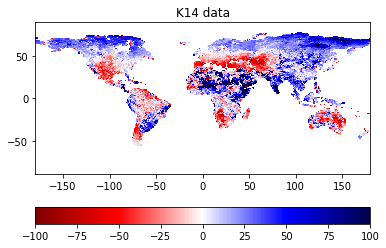

In [62]:
cPlot = plt.pcolormesh(lon,lat,diffMean_K14,cmap='seismic_r',vmin=-100,vmax=100)
plt.colorbar(cPlot,orientation='horizontal')
plt.title('K14 data')
plt.show()


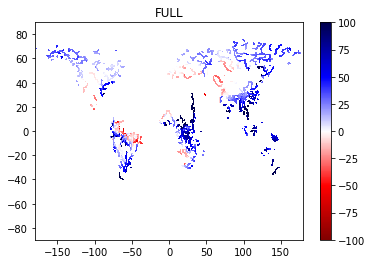

In [61]:
plt.pcolormesh(lon,lat,pctAvgFull,cmap='seismic_r',vmin=-100,vmax=100)
plt.colorbar()
plt.title('FULL')
plt.show()

*Mask out gridcells where not defined...*

In [10]:
#Only include gridcells were valid data exists...

diffMean_K14[np.where(np.isfinite(pctAvgFull)==False)] = np.nan
diffQ5_K14[np.where(np.isfinite(pctMaxFull)==False)]   = np.nan
diffQ95_K14[np.where(np.isfinite(pctMinFull)==False)]  = np.nan


**Attempt 1: Pattern Correlation**<br>
*Results:* Overall, there's a better match than for flooding, but it's still pretty poor. The Pearson product-moment correlation coefficient is just 0.17 (R^2 of 0.03). 

In [11]:
#Need to convert to 1d array for both...  
k14mean_select  = diffMean_K14[np.where(np.isfinite(diffMean_K14)==True)]
k14q5_select    = diffQ5_K14[np.where(np.isfinite(diffQ5_K14)==True)]
k14q95_select   = diffQ95_K14[np.where(np.isfinite(diffQ95_K14)==True)]

fullMean_select = pctAvgFull[np.where(np.isfinite(diffMean_K14)==True)]
fullLow_select  = pctMinFull[np.where(np.isfinite(diffQ95_K14)==True)]
fullHigh_select = pctMaxFull[np.where(np.isfinite(diffQ5_K14)==True)]


#Print out the correlation coefficient between the two... 
corrCoefMean = np.corrcoef(k14mean_select,fullMean_select)  
corrCoefHigh = np.corrcoef(k14q5_select,fullHigh_select)  
corrCoefLow  = np.corrcoef(k14q95_select,fullLow_select)  

print('----- Mean flow -----')
print('Pearson product-moment correlation coefficient: ', corrCoefMean[0,1])
print('R^2: ', corrCoefMean[0,1]**2)
print()
print('----- Peak flow -----')
print('Pearson product-moment correlation coefficient: ', corrCoefHigh[0,1])
print('R^2: ', corrCoefHigh[0,1]**2)
print()
print('----- Low flow -----')
print('Pearson product-moment correlation coefficient: ', corrCoefLow[0,1])
print('R^2: ', corrCoefLow[0,1]**2)


----- Mean flow -----
Pearson product-moment correlation coefficient:  0.17209925562250156
R^2:  0.029618153785819133

----- Peak flow -----
Pearson product-moment correlation coefficient:  0.23291149107262546
R^2:  0.05424776267367369

----- Low flow -----
Pearson product-moment correlation coefficient:  0.17324927018532166
R^2:  0.030015309619746584


**Attempt 2: Does the overall sign of change match?**<br>
*Results:* Pretty well!

In [105]:
# -- New approach... -- # 
matchMean = np.full(np.shape(diffMean_K14),np.nan)
matchHigh = np.full(np.shape(diffMean_K14),np.nan)
matchLow  = np.full(np.shape(diffMean_K14),np.nan)

countMissMean = 0 
countMissHigh = 0
countMissLow  = 0

for ilon in range(len(lon)):
    for ilat in range(len(lat)):
        
        #Isolate specific gridcell 
        fullMean = pctAvgFull[ilat,ilon]
        fullHigh = pctMaxFull[ilat,ilon]
        fullLow  = pctMinFull[ilat,ilon]
        
        k14mean  = diffMean_K14[ilat,ilon]
        k14high  = diffQ5_K14[ilat,ilon]
        k14low   = diffQ95_K14[ilat,ilon]
        
        #Mean Flow 
        if np.isfinite(fullMean)==True and np.isfinite(k14mean)==True:
            if fullMean>0 and k14mean>0: 
                matchMean[ilat,ilon] = 1 
            elif fullMean<0 and k14mean<0:
                matchMean[ilat,ilon] = 1 
            elif fullMean<=-0.0009 and k14mean>=0.0009:
                matchMean[ilat,ilon] = 1
            else:
                countMissMean = countMissMean+1
        
        #Peak flow 
        if np.isfinite(fullHigh)==True and np.isfinite(k14high)==True:
            if fullHigh>0 and k14high>0: 
                matchHigh[ilat,ilon] = 1 
                #countGT = countGT+1
            elif fullHigh<0 and k14high<0:
                matchHigh[ilat,ilon] = 1 
                #countLT = countLT+1
            elif fullHigh<=-0.0009 and k14high>=0.0009:
                matchHigh[ilat,ilon] = 1
                #countEq = countEq+1
            else:
                countMissHigh = countMissHigh+1
        
        # Low flow 
        if np.isfinite(fullLow)==True and np.isfinite(k14low)==True:
            if fullLow>0 and k14low>0: 
                matchLow[ilat,ilon] = 1 
                #countGT = countGT+1
            elif fullLow<0 and k14low<0:
                matchLow[ilat,ilon] = 1 
                #countLT = countLT+1
            elif fullLow<=-0.0009 and k14low>=0.0009:
                matchLow[ilat,ilon] = 1
                #countEq = countEq+1
            else:
                countMissLow = countMissLow+1
                

In [108]:
print('---- Summary of matches ----')
print('numMatch [Mean]: ', np.nansum(matchMean))
print('pctMatch [Mean]: ', np.nansum(matchMean) / (np.nansum(matchMean)+np.nansum(countMissMean))*100, '%')
print()
print('numMatc  [High]: ', np.nansum(matchHigh))
print('pctMatch [High]: ', np.nansum(matchHigh) / (np.nansum(matchHigh)+np.nansum(countMissHigh))*100, '%')
print()
print('numMatc  [Low]: ', np.nansum(matchLow))
print('pctMatch [Low]: ', np.nansum(matchLow) / (np.nansum(matchHigh)+np.nansum(countMissLow))*100, '%')


---- Summary of matches ----
numMatch [Mean]:  8454.0
pctMatch [Mean]:  79.23149015932522 %

numMatc  [High]:  15606.0
pctMatch [High]:  80.48893702614885 %

numMatc  [Low]:  12603.0
pctMatch [Low]:  68.03606132584756 %


**Attempt 3: What does the bias map look like?**<br>
*Results:* 

/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


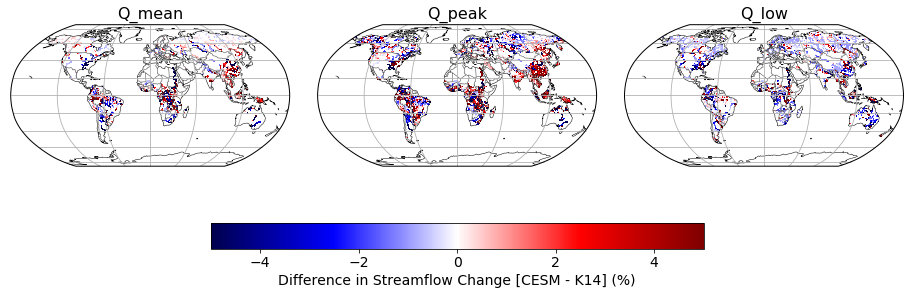

In [27]:
# -- Plot biases between our streamflow and K14 multi-model mean -- #
biasMean = (pctAvgFull - diffMean_K14)/diffMean_K14
biasHigh = (pctMaxFull - diffQ5_K14)/diffQ5_K14
biasLow  = (pctMinFull - diffQ95_K14)/diffQ95_K14


## --- Set up figure window --- 
fig, ax_array = plt.subplots(1,3,subplot_kw={'projection':ccrs.Robinson()})
ax1,ax2,ax3 = ax_array.flatten()
#fig.set_size_inches(11.5,8.5)
fig.set_size_inches(16,12)

# MEAN #
ax1.set_global()
contour_plot = ax1.pcolormesh(lon,lat,biasMean,cmap='seismic',vmin=-5,vmax=5,transform=ccrs.PlateCarree())
#Other figure options 
ax1.set_title('Q_mean',fontsize=16)
ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.gridlines()
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


# PHYS #
ax2.set_global()
contour_plot = ax2.pcolormesh(lon,lat,biasHigh,cmap='seismic',vmin=-5,vmax=5,transform=ccrs.PlateCarree())
#Colorbar options 
ax_position = ax2.get_position()
cbar_ax = fig.add_axes([ax_position.x0-0.1, ax_position.y0+0.2, ax_position.width+0.2, 0.03])
cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
cbar.set_label('Difference in Streamflow Change [CESM - K14] (%)',fontsize=14)
cbar.ax.tick_params(labelsize=14)
#Other figure options 
ax2.set_title('Q_peak',fontsize=16)
ax2.coastlines(linewidth=0.5,edgecolor='0.25')
ax2.gridlines()
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

# RAD #
ax3.set_global()
contour_plot = ax3.pcolormesh(lon,lat,biasLow,cmap='seismic',vmin=-5,vmax=5,transform=ccrs.PlateCarree())
#Other figure options 
ax3.set_title('Q_low',fontsize=16)
ax3.coastlines(linewidth=0.5,edgecolor='0.25')
ax3.gridlines()
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

fig.subplots_adjust(wspace=0.1, hspace=0.05)

#Save figure
fig.savefig('/Users/meganfowler/Documents/Irvine/Flooding/Physiology/Illustrator/Supplement_K14bias.pdf',bbox_inches = 'tight')  #Save figure as pdf vector graphic

